Telecom customer Churn Analysis - EDA Project

In [3]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

Reading Data

In [4]:
df = pd.read_csv("CustomerChurn.csv")

Obseriving Data

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [6]:
df.shape

(7043, 21)

In [11]:
# observation: 7043 records/rows &  21 columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
# 'TechSupport,'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'   <-- These re the Columns

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Only SeniorCitizen, tenure are having Integer values , MonthlyCharges having float and rest are having string values

- Only gender, customerId and tenure is having lowercase letter as column name, hence thse can be modified to uppercase.

- Total charges should be having float values, hence this needs to be changed

In [6]:
df.columns = df.columns.str.capitalize()

In [24]:
df.describe()

,Seniorcitizen,Tenure,Monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Seniorcitizen, Tenure	 has 0 as minimum , but Seniorcitizen is a categorical column hence ignored. tenure needs to be checked.

In [27]:
print(df["Tenure"].min())

0


- Since Churn analysis is being done, Churn data needs to be analyized and plotted most of the time with respect to one or multiple column

In [34]:
print(df.Churn.value_counts())

df.Churn.value_counts()/len(df)* 100

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

- Only Two unique values are there in Churn column , Yes(1869 & 26.53%) & No(5174  & 73.46%). Data is imbalanceed.

Text(0.5, 1.02, 'Count of Churn per category')

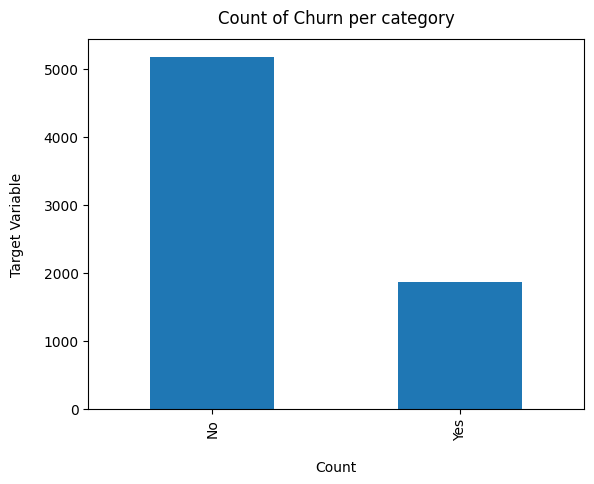

In [36]:
df["Churn"].value_counts().plot(kind="bar") 
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Churn per category", y=1.02)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Seniorcitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   Phoneservice      7043 non-null   object 
 7   Multiplelines     7043 non-null   object 
 8   Internetservice   7043 non-null   object 
 9   Onlinesecurity    7043 non-null   object 
 10  Onlinebackup      7043 non-null   object 
 11  Deviceprotection  7043 non-null   object 
 12  Techsupport       7043 non-null   object 
 13  Streamingtv       7043 non-null   object 
 14  Streamingmovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperlessbilling  7043 non-null   object 


- Here in Totalcharges there might be missing values since its in object type, hence missing values needs to checked

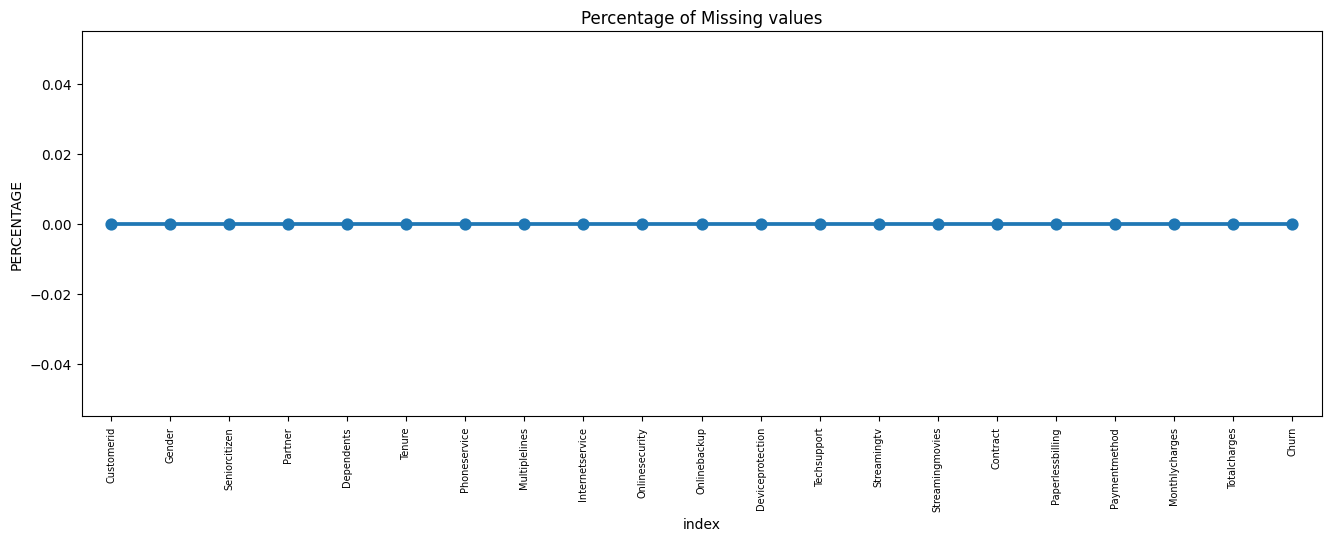

In [38]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Aparently there are no missing values


- Data Cleaning

In [7]:
new_df = df.copy()

new_df.Totalcharges = pd.to_numeric(new_df.Totalcharges, errors='coerce')
new_df.isnull().sum()

Customerid           0
Gender               0
Seniorcitizen        0
Partner              0
Dependents           0
Tenure               0
Phoneservice         0
Multiplelines        0
Internetservice      0
Onlinesecurity       0
Onlinebackup         0
Deviceprotection     0
Techsupport          0
Streamingtv          0
Streamingmovies      0
Contract             0
Paperlessbilling     0
Paymentmethod        0
Monthlycharges       0
Totalcharges        11
Churn                0
dtype: int64

11 missing values are present after Totalcharges is converted to numeric and checked if null values are persent. These records needs to be checked

In [8]:
new_df.loc[new_df ['Totalcharges'].isnull() == True]


,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Handling missing values

Since missing values percentage is 0.15% , it can be ignored and deleted.

In [9]:
new_df.dropna(how = 'any', inplace = True)

In [48]:
new_df.isnull().sum()

Customerid          0
Gender              0
Seniorcitizen       0
Partner             0
Dependents          0
Tenure              0
Phoneservice        0
Multiplelines       0
Internetservice     0
Onlinesecurity      0
Onlinebackup        0
Deviceprotection    0
Techsupport         0
Streamingtv         0
Streamingmovies     0
Contract            0
Paperlessbilling    0
Paymentmethod       0
Monthlycharges      0
Totalcharges        0
Churn               0
dtype: int64

Data is cleaned

In [52]:
print(new_df.Tenure.value_counts())
print(new_df.Tenure.max())



Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
72


Tenure values are in months & max Tenure is 72 months and it can be grouped togather based on range, hence its better approach to create bin of those Tenure.

In [54]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['Tenure_Group'] = pd.cut(new_df.Tenure, range(1, 80, 12), right=False, labels=labels)

In [55]:
new_df['Tenure_Group'].value_counts()

Tenure_Group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Removing columns those are not required as data cleaning activity.

In [57]:
new_df.drop(columns= ['Customerid','Tenure'], axis=1, inplace=True)
new_df.head(2)

,Gender,Seniorcitizen,Partner,Dependents,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn,Tenure_Group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36


- Data Exploration

# Univariate Analysis


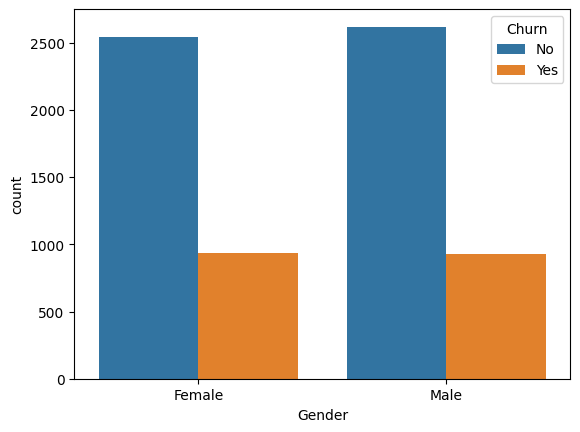

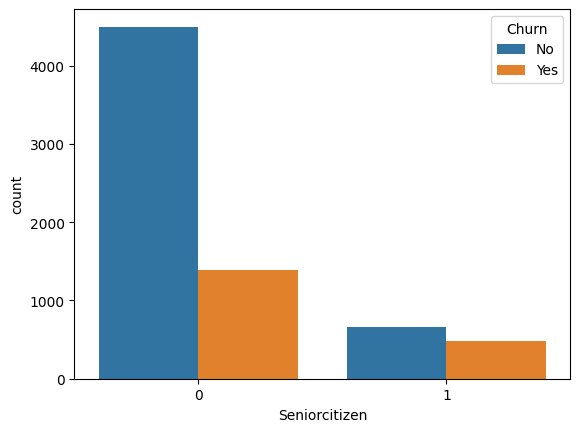

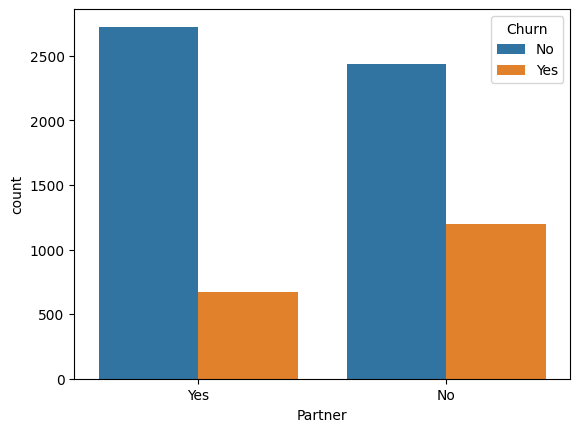

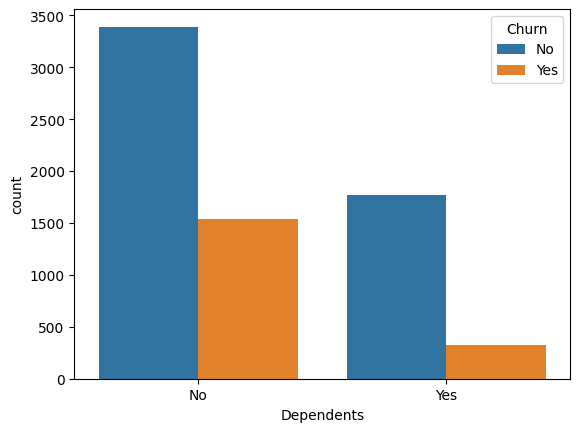

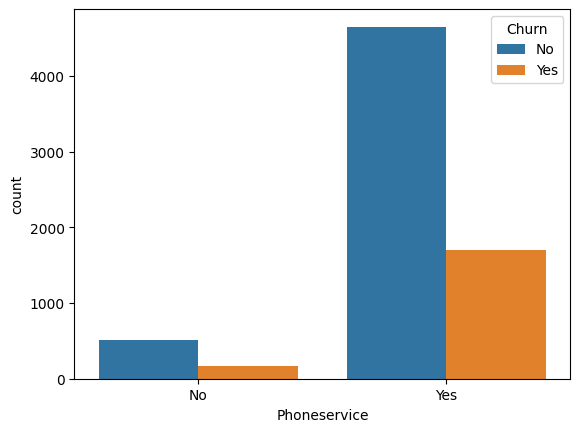

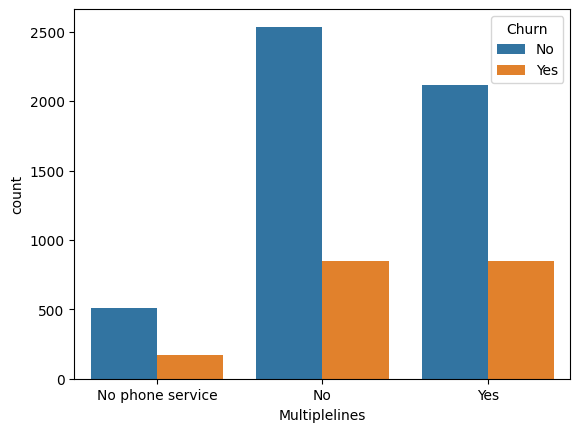

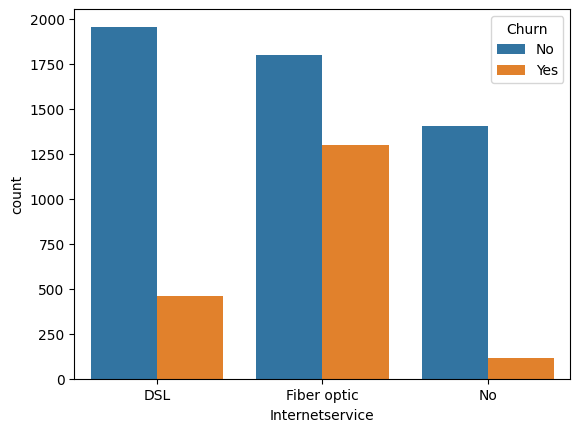

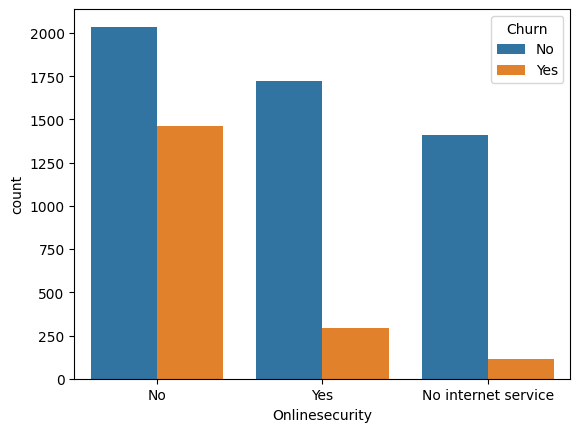

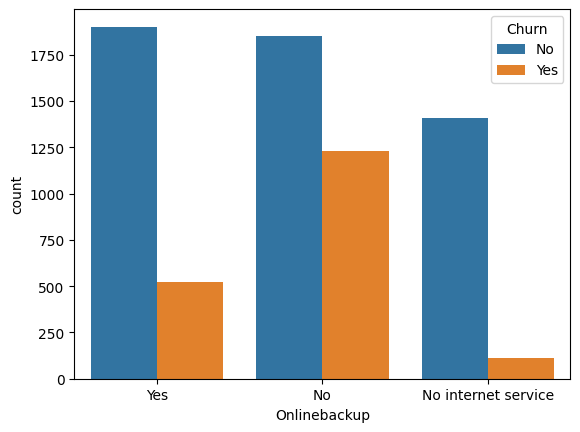

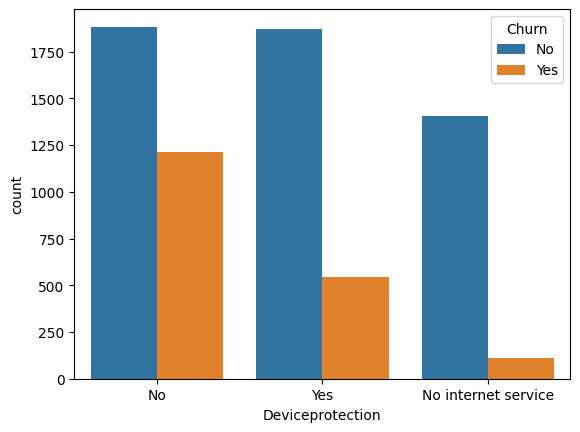

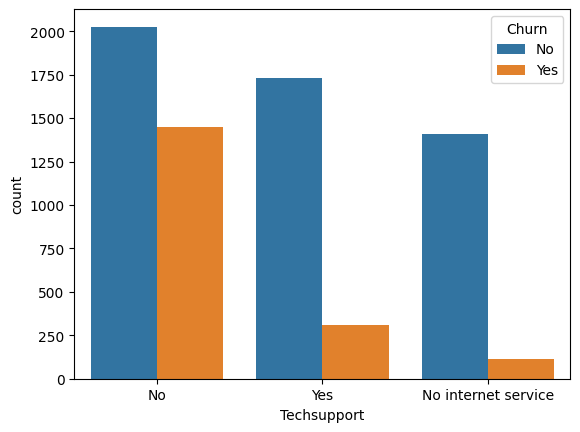

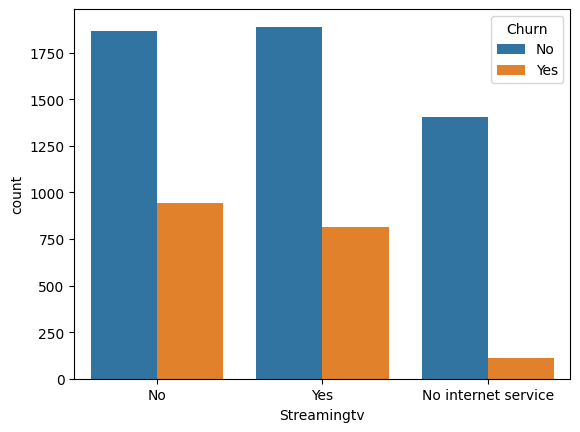

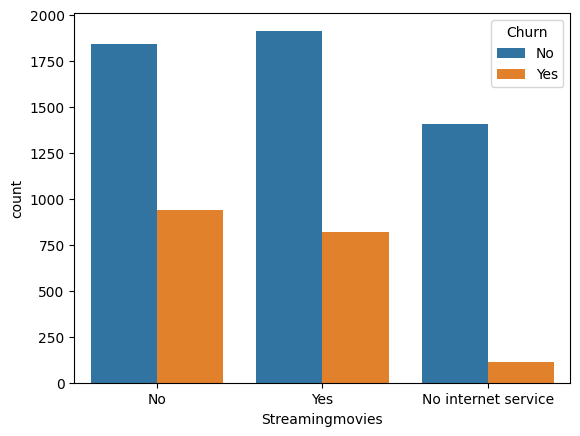

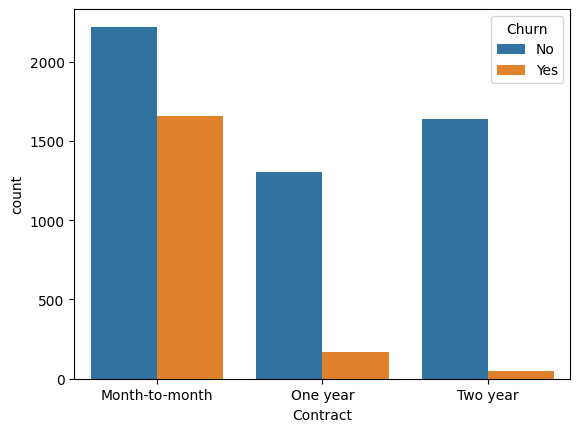

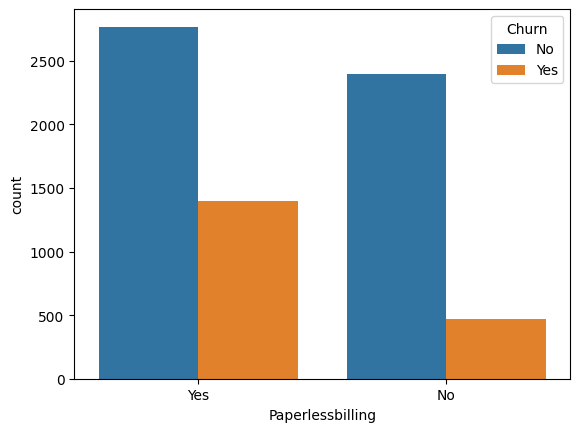

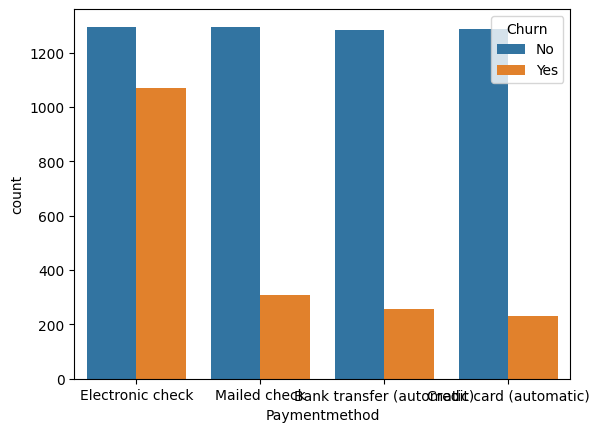

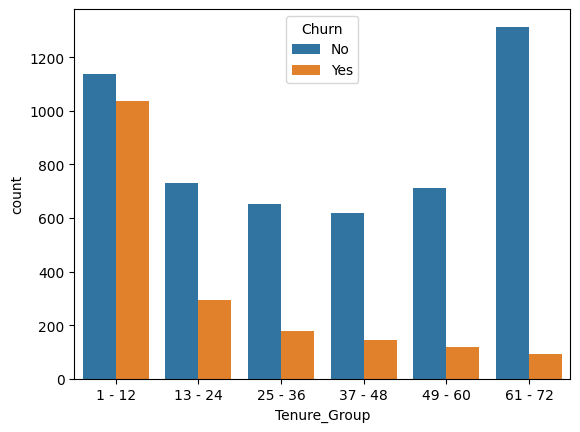

In [58]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'Totalcharges', 'Monthlycharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn')

For ease of plotting Churn column is converted to nemeric column. As well all  categorical comuns are converted to dummy variables.


In [29]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [60]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,Seniorcitizen,Monthlycharges,Totalcharges,Churn,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Paymentmethod_Bank transfer (automatic),Paymentmethod_Credit card (automatic),Paymentmethod_Electronic check,Paymentmethod_Mailed check,Tenure_Group_1 - 12,Tenure_Group_13 - 24,Tenure_Group_25 - 36,Tenure_Group_37 - 48,Tenure_Group_49 - 60,Tenure_Group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


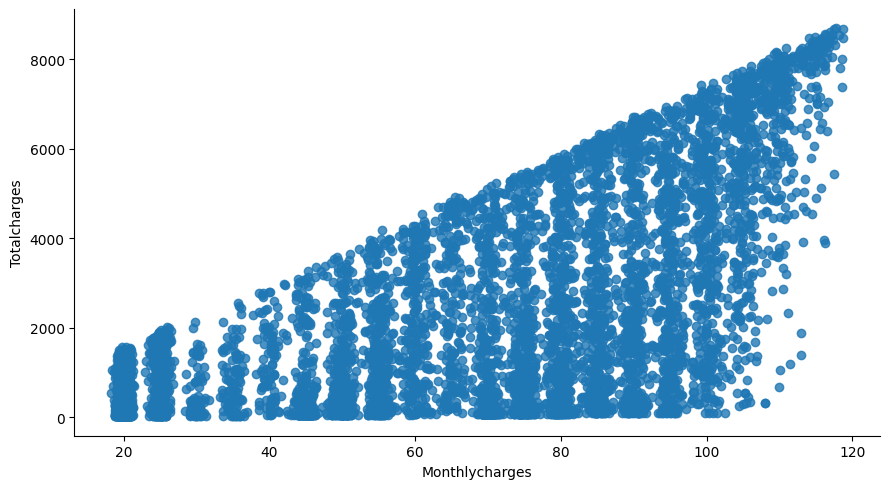

In [62]:
sns.lmplot(data=new_df_dummies, x='Monthlycharges', y='Totalcharges', fit_reg=False,aspect=1.8)


In [63]:
new_df_dummies["Monthlycharges"].corr(new_df_dummies["Totalcharges"])

0.6510648032262027

Text(0.5, 1.0, 'Monthly charges by churn')

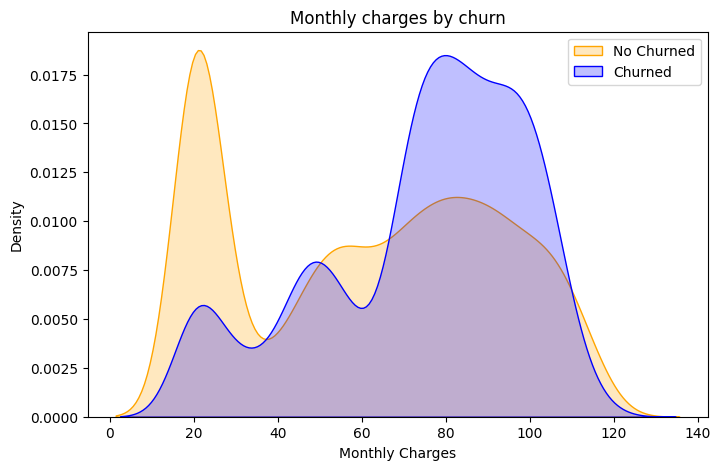

In [65]:
fig,ax = plt.subplots(figsize= (8,5))
grph = sns.kdeplot(new_df_dummies.Monthlycharges[(new_df_dummies["Churn"] == 0) ], color="Orange", fill= True,ax= ax)
grph = sns.kdeplot(new_df_dummies.Monthlycharges[(new_df_dummies["Churn"] == 1) ], color="Blue", fill= True, ax= ax)
grph.legend(["No Churned","Churned"],loc='upper right')
grph.set_ylabel('Density')
grph.set_xlabel('Monthly Charges')
grph.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

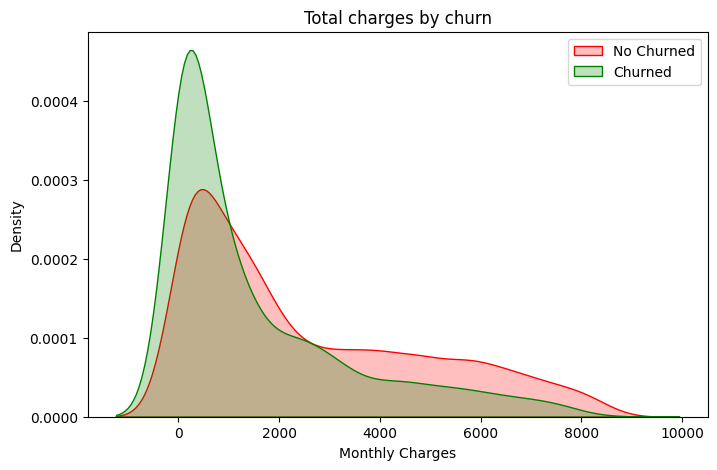

In [66]:
fig,ax = plt.subplots(figsize= (8,5))
grph = sns.kdeplot(new_df_dummies.Totalcharges[(new_df_dummies["Churn"] == 0) ], color="Red", fill= True,ax= ax)
grph = sns.kdeplot(new_df_dummies.Totalcharges[(new_df_dummies["Churn"] == 1) ], color="Green", fill= True, ax= ax)
grph.legend(["No Churned","Churned"],loc='upper right')
grph.set_ylabel('Density')
grph.set_xlabel('Monthly Charges')
grph.set_title('Total charges by churn')

Text(0.5, 1.0, 'Tenure by churn')

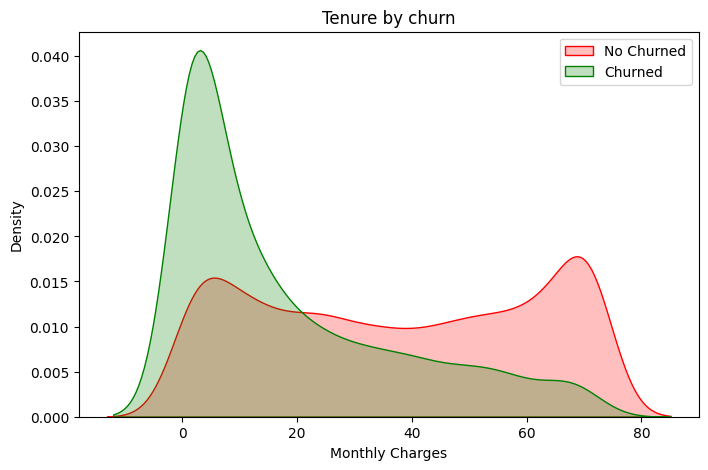

In [71]:
fig,ax = plt.subplots(figsize= (8,5))
grph = sns.kdeplot(df.Tenure[(df["Churn"] == "No") ], color="Red", fill= True,ax= ax)
grph = sns.kdeplot(df.Tenure[(df["Churn"] == "Yes") ], color="Green", fill= True, ax= ax)
grph.legend(["No Churned","Churned"],loc='upper right')
grph.set_ylabel('Density')
grph.set_xlabel('Monthly Charges')
grph.set_title('Tenure by churn')

<Axes: >

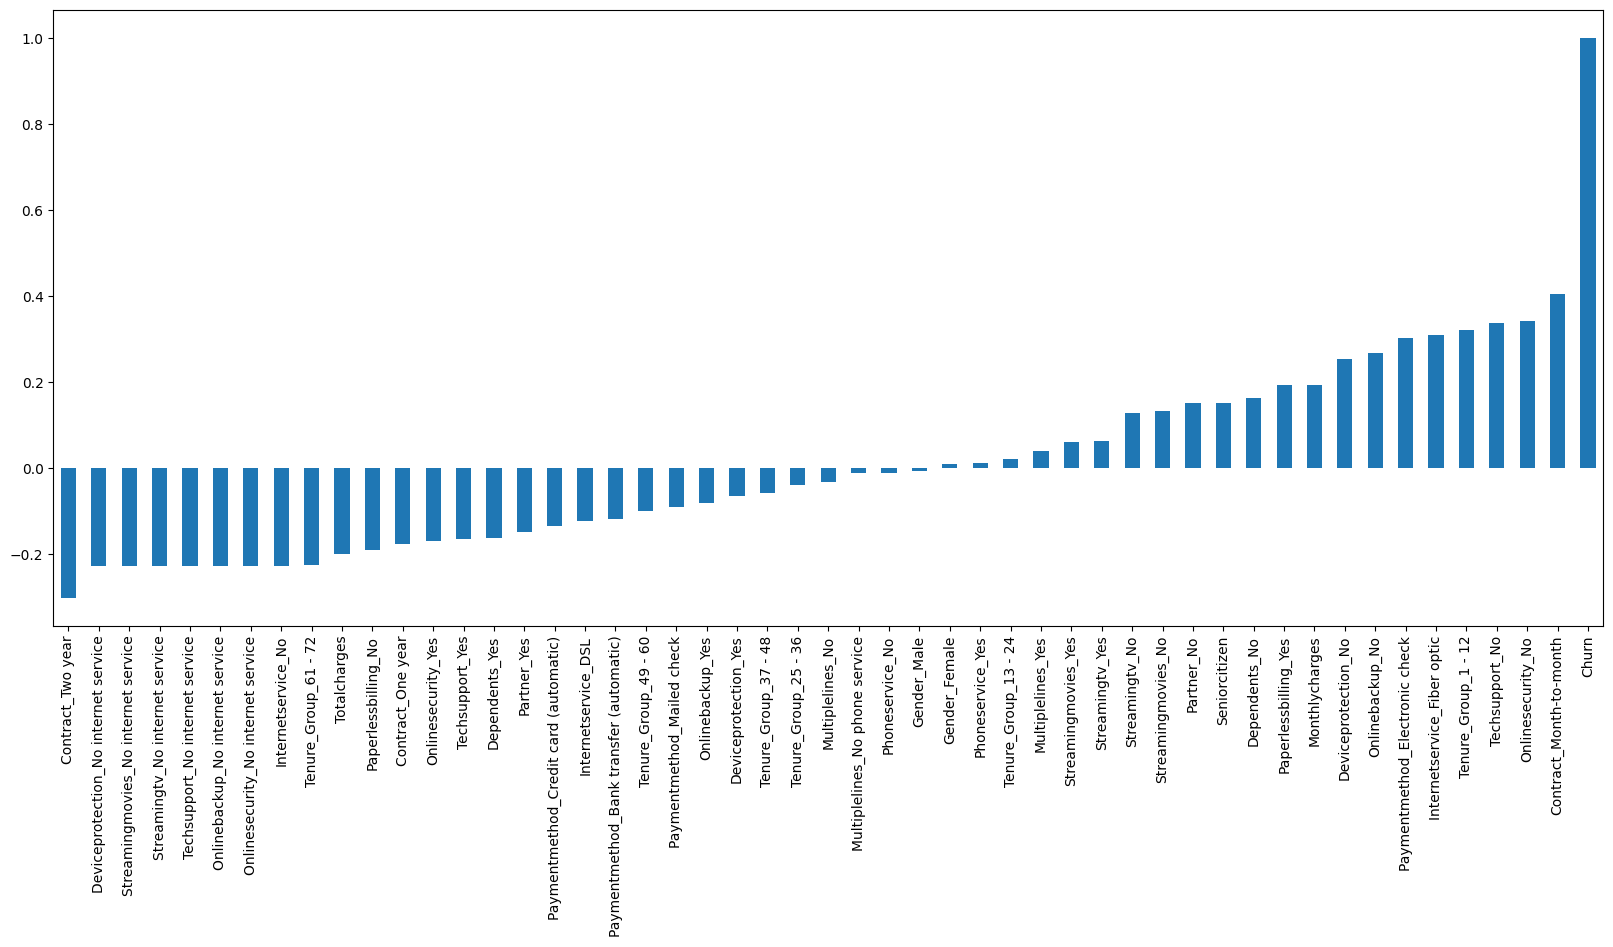

In [73]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = True).plot(kind='bar')

# Bivariate Analysis

For bivariate analysis two dataframe based on churned user is created for plotting graph based on churn with respect to another variables. Also a new function is created to handle the plotting.

In [30]:
df_churned=new_df.loc[new_df["Churn"]==1]
df_not_churned=new_df.loc[new_df["Churn"]==0]
df_churned

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1


In [75]:
def bivariatePlot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 10)
    plt.xticks(rotation=45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

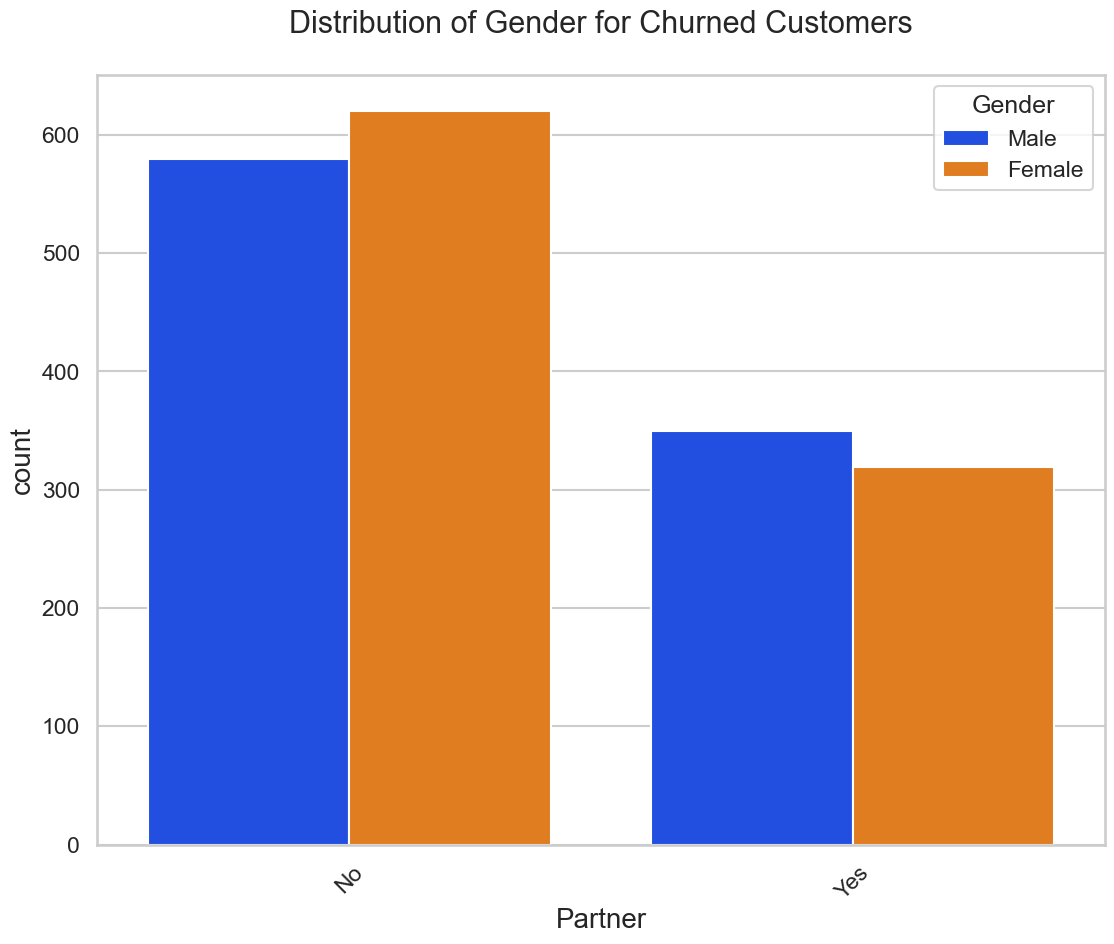

In [77]:
bivariatePlot(df_churned,col='Partner',title='Distribution of Gender for Churned Customers',hue='Gender')


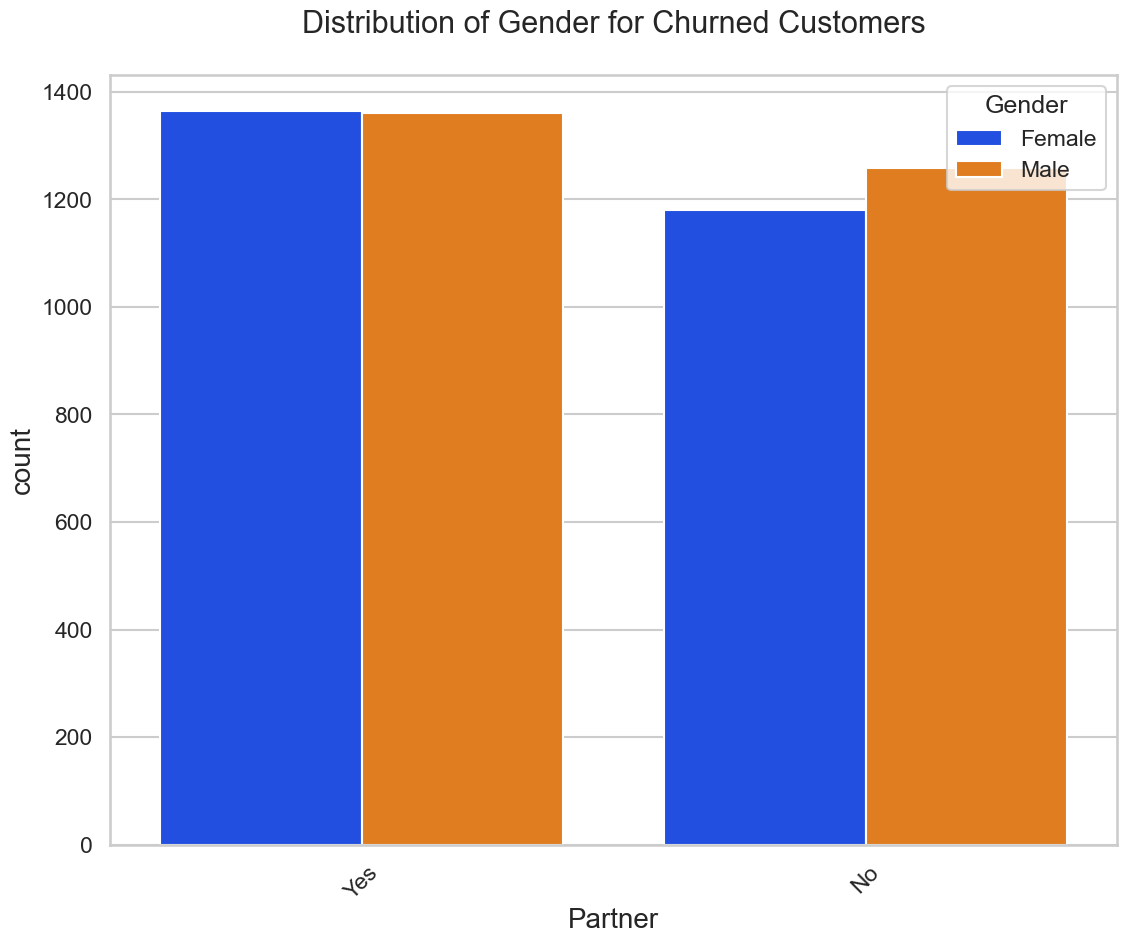

In [78]:
bivariatePlot(df_not_churned,col='Partner',title='Distribution of Gender for Churned Customers',hue='Gender')


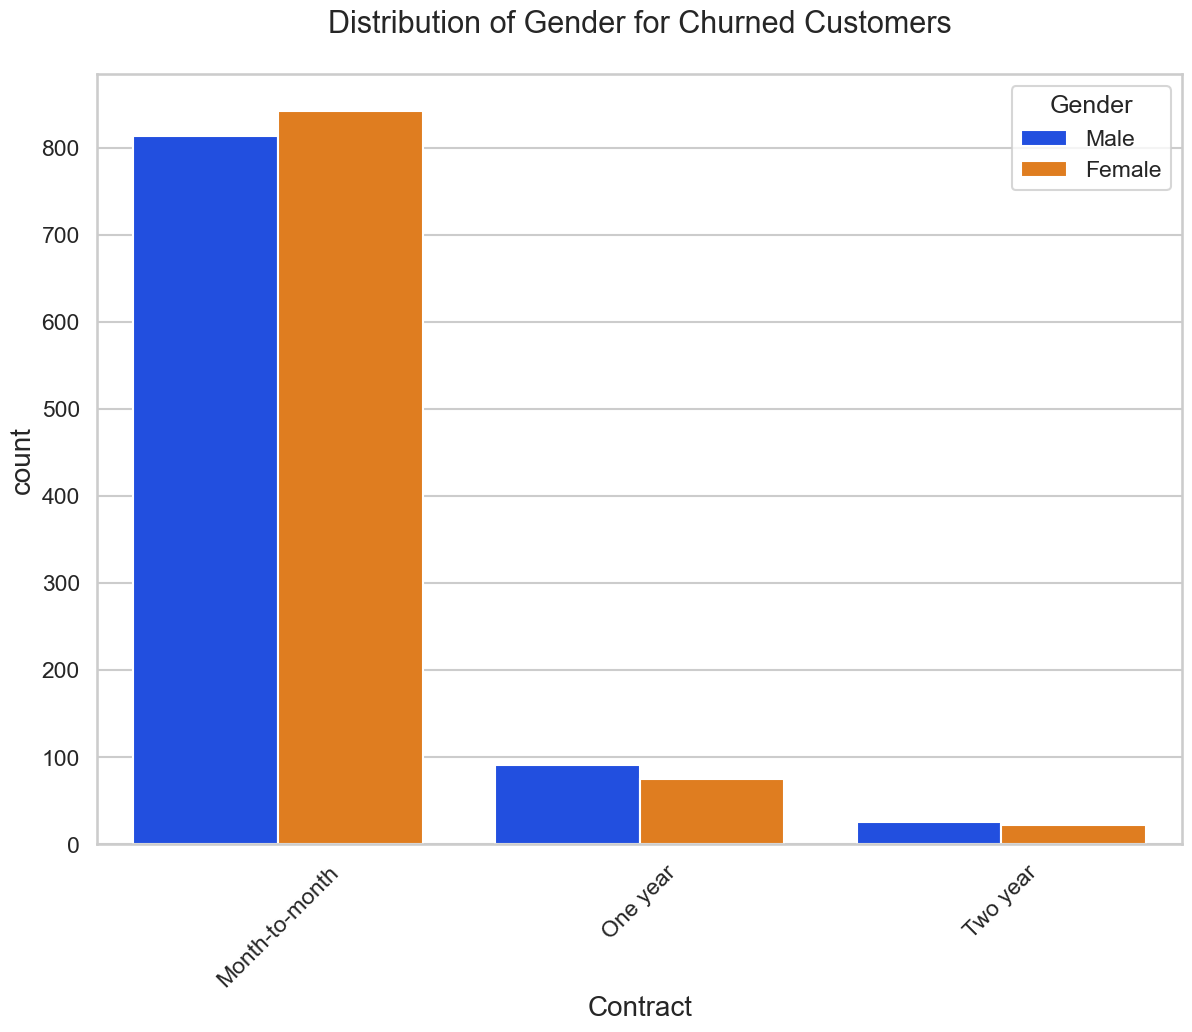

In [79]:
bivariatePlot(df_churned,col='Contract',title='Distribution of Gender for Churned Customers',hue='Gender')


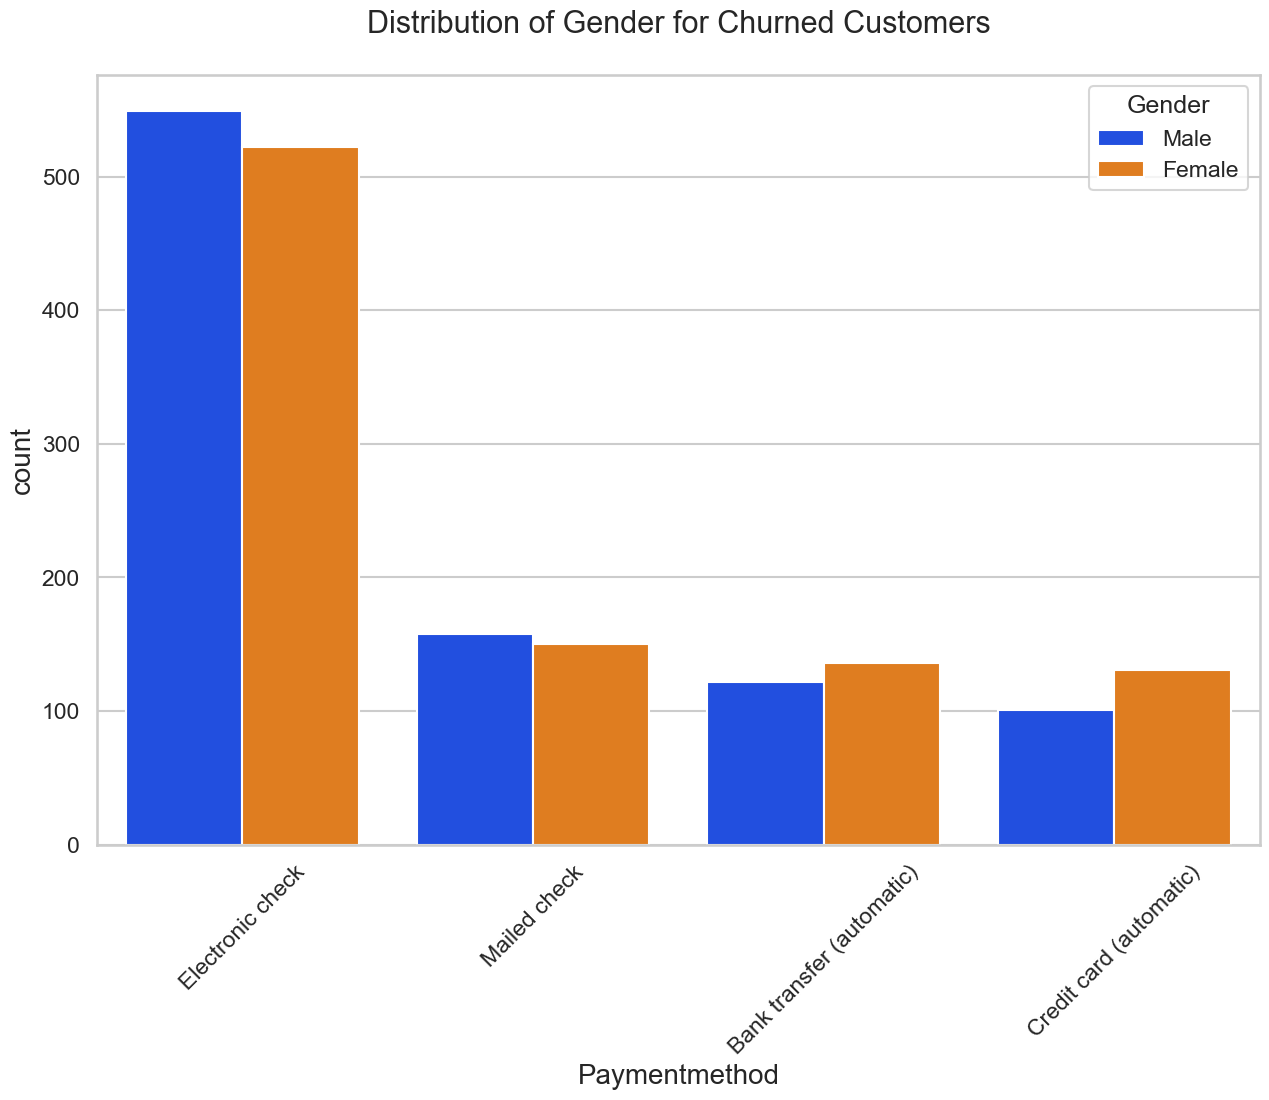

In [80]:
bivariatePlot(df_churned,col='Paymentmethod',title='Distribution of Gender for Churned Customers',hue='Gender')


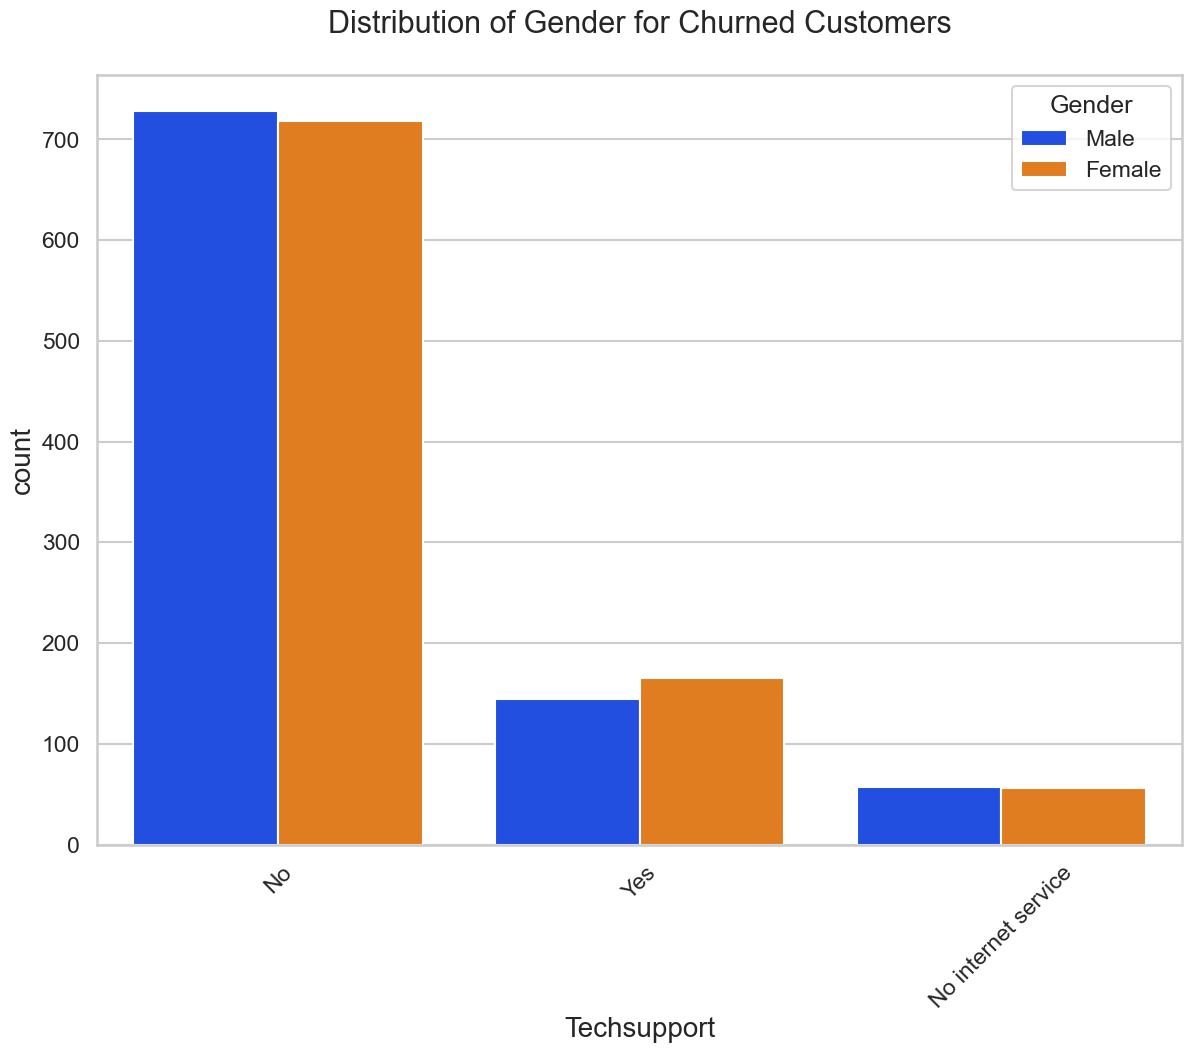

In [82]:
bivariatePlot(df_churned,col='Techsupport',title='Distribution of Gender for Churned Customers',hue='Gender')


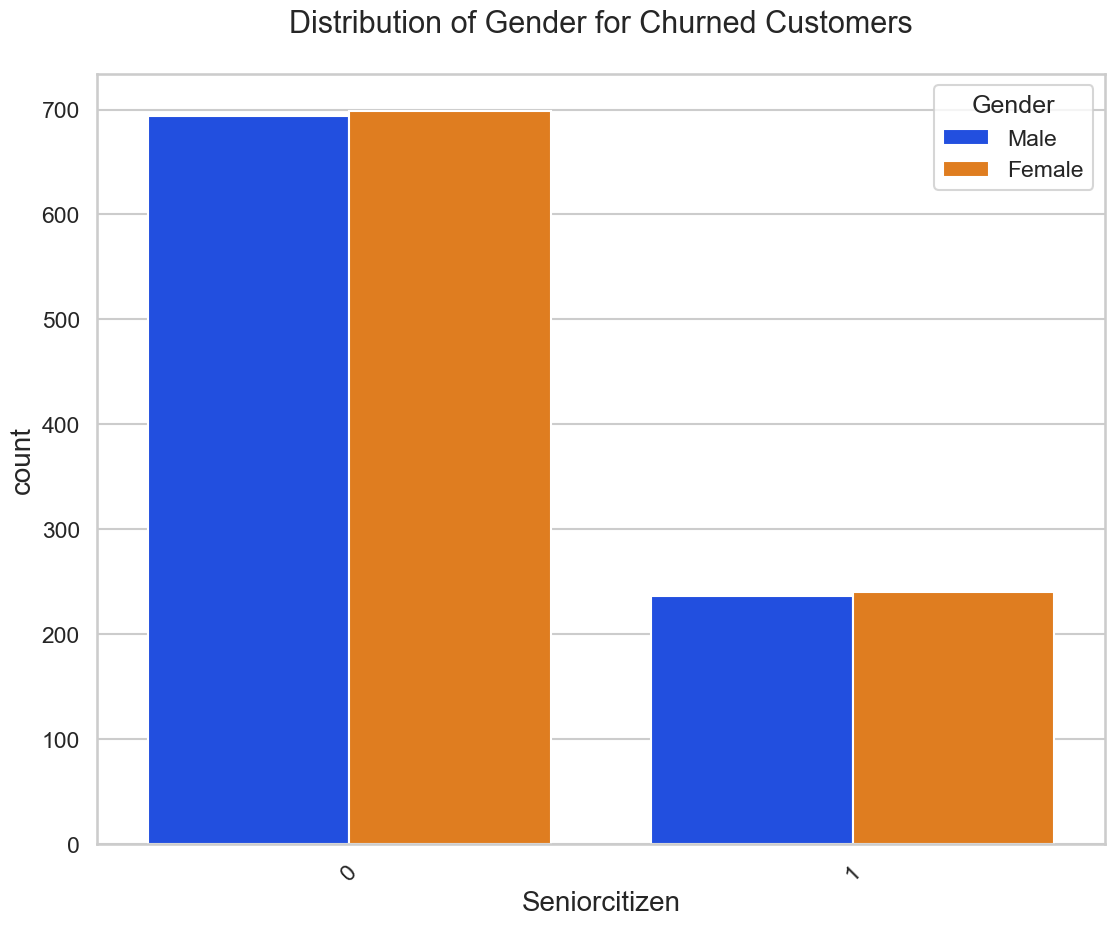

In [83]:
bivariatePlot(df_churned,col='Seniorcitizen',title='Distribution of Gender for Churned Customers',hue='Gender')


In [24]:
bivariatePlot(df_churned,col='Partner',title='Distribution of Gender for Churned Customers',hue='Gender')


NameError: name 'bivariatePlot' is not defined

Text(0, 0.5, 'Not Churned User')

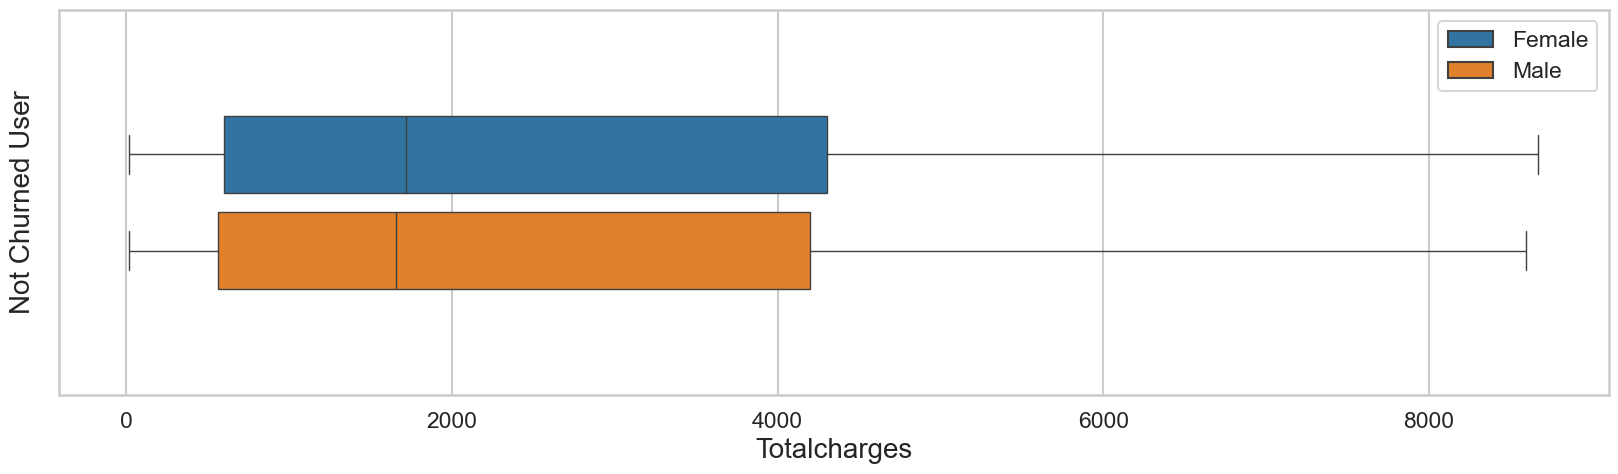

In [115]:
plt.subplots(figsize=(20,5))
sns.boxplot(data=df_not_churned,x="Totalcharges",hue="Gender",gap=.2,width=.5)
plt.legend(loc="upper right")
plt.ylabel("Not Churned User")

